### Ishaan Mehta E18CSE069 EB02 LabWeek6

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Sklearn linear regression model
from sklearn.linear_model import LinearRegression

# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score

# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

# Feature selection using Recursive Feature Elimimation
from sklearn.feature_selection import RFE

In [2]:
#load the data and inspect the first 5 rows
data = pd.read_csv('./bike.csv')
data.head()

,id,season,year,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt
0,12765,winter,2016,0,6,0,cloud,0.344167,0.363625,0.805833,0.160446,7,1,2,2,226,654,880
1,12766,winter,2016,0,0,0,cloud,0.363478,0.353739,0.696087,0.248539,8,1,8,1,125,670,795
2,12767,winter,2016,0,1,1,fair,0.196364,0.189405,0.437273,0.248309,3,1,10,2,75,1229,1304
3,12768,winter,2016,0,2,1,fair,0.200000,0.212122,0.590435,0.160296,0,1,8,3,67,1454,1521
4,12769,winter,2016,0,3,1,fair,0.226957,0.229270,0.436957,0.186900,2,0,5,1,58,1518,1576


In [3]:
# print the data types of each feature name
o = {
    "Feature" : [],
    "Data Type": []
}
for feature in data:
    o["Feature"].append(feature)
    o["Data Type"].append(data[feature].dtype)
o = pd.DataFrame(o)
o

,Feature,Data Type
0,id,int64
1,season,object
2,year,int64
3,holiday,int64
4,weekday,int64
5,workingday,int64
6,weather,object
7,temp,float64
8,feel_temp,float64
9,hum,float64


In [4]:
# check for null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        365 non-null    int64  
 1   season                    365 non-null    object 
 2   year                      365 non-null    int64  
 3   holiday                   365 non-null    int64  
 4   weekday                   365 non-null    int64  
 5   workingday                365 non-null    int64  
 6   weather                   365 non-null    object 
 7   temp                      365 non-null    float64
 8   feel_temp                 365 non-null    float64
 9   hum                       365 non-null    float64
 10  windspeed                 365 non-null    float64
 11  promotion_level           365 non-null    int64  
 12  promotion_type            365 non-null    int64  
 13  promotion_level_external  365 non-null    int64  
 14  promotion_

In [5]:
# print out the unique values of the features ['season', 'year', 'weather', 'promotion_type']
unique = ['season', 'year', 'weather', 'promotion_type']
[data[feature].values for feature in unique]

[array(['winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
        'winter', 'winter', 'winter', 'winter', 'winter', 'spring',
        'spring', 'spring', 'spring', 'spring', 'spring', 'spring',
        'spring', 'spring', 'spring', 'spring', 'spring', 'spring',
        'spring', 'spring', 'spring', 'spring', 'spring', 'spring',
        'spring', 'spring', 'spring', 'spring', 'spring', 'spring',
        'spring', 'spring', 'spring', 'spring', 

In [6]:
# print out the value counts (frequency of occurence) of the unique values in these features ['season', 'year', 'weather', 'promotion_type']
[data[feature].value_counts() for feature in unique]

[spring    92
 summer    92
 autumn    91
 winter    90
 Name: season, dtype: int64,
 2016    365
 Name: year, dtype: int64,
 fair     226
 cloud    124
 rain      15
 Name: weather, dtype: int64,
 1    183
 0    182
 Name: promotion_type, dtype: int64]

In [7]:
# print the shape of data
data.shape

(365, 18)

In [8]:
# drop the feature 'id' as it has no information to deliver.
data = data.drop('year', axis = 1)
data = data.drop('id', axis = 1)
# print the shape of data
data.shape

(365, 16)

In [9]:
[data[feature].value_counts() for feature in data.columns]

[spring    92
 summer    92
 autumn    91
 winter    90
 Name: season, dtype: int64,
 0    355
 1     10
 Name: holiday, dtype: int64,
 6    53
 5    52
 4    52
 3    52
 2    52
 1    52
 0    52
 Name: weekday, dtype: int64,
 1    250
 0    115
 Name: workingday, dtype: int64,
 fair     226
 cloud    124
 rain      15
 Name: weather, dtype: int64,
 0.635000    4
 0.673333    3
 0.775000    3
 0.410000    3
 0.733333    3
            ..
 0.216522    1
 0.648333    1
 0.726667    1
 0.348333    1
 0.437500    1
 Name: temp, Length: 294, dtype: int64,
 0.466525    2
 0.398350    2
 0.318812    2
 0.522721    2
 0.529675    2
            ..
 0.186033    1
 0.651521    1
 0.538529    1
 0.451988    1
 0.219700    1
 Name: feel_temp, Length: 353, dtype: int64,
 0.605000    3
 0.729583    3
 0.542500    3
 0.805833    2
 0.574167    2
            ..
 0.580417    1
 0.400000    1
 0.637500    1
 0.682500    1
 0.741739    1
 Name: hum, Length: 332, dtype: int64,
 0.110700    2
 0.149883    

In [10]:
# one hot encode the categorical columns.
cats = ['weekday', 'season', 'weather']
for cat in cats:
    data = pd.concat([data,pd.get_dummies(data[cat], prefix=cat,dummy_na=True)],axis=1)
    data.drop([cat],axis=1, inplace=True)
# print the shape of data 
# notice the increase in the no. of features
data.shape

(365, 30)

In [11]:
# Split the dataset into X and y
# While loading data into X drop the columns "cnt" and "casual". 
X = data.drop(['cnt', 'casual'], axis=1)
# notice the target variable is 'cnt'
y = data['cnt']

In [12]:
# store the names of the training features / name of the columns used for training. [Very important step for visualization later.]

train_columns = list(X.columns)
print(train_columns)

['holiday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_type', 'promotion_level_external', 'promotion_type_external', 'registered', 'weekday_0.0', 'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0', 'weekday_5.0', 'weekday_6.0', 'weekday_nan', 'season_autumn', 'season_spring', 'season_summer', 'season_winter', 'season_nan', 'weather_cloud', 'weather_fair', 'weather_rain', 'weather_nan']


In [13]:
# Apply scaling if our data is spread across wide differences of range values.
data.describe()

,holiday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,...,weekday_nan,season_autumn,season_spring,season_summer,season_winter,season_nan,weather_cloud,weather_fair,weather_rain,weather_nan
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.0,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.0
mean,0.027397,0.684932,0.486665,0.466835,0.643665,0.191403,4.520548,0.501370,5.139726,1.471233,...,0.0,0.249315,0.252055,0.252055,0.246575,0.0,0.339726,0.619178,0.041096,0.0
std,0.163462,0.465181,0.189596,0.168836,0.148744,0.076890,1.896422,0.500684,2.905978,1.100634,...,0.0,0.433210,0.434789,0.434789,0.431609,0.0,0.474266,0.486255,0.198785,0.0
min,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,0.000000,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.325000,0.321954,0.538333,0.135583,3.000000,0.000000,3.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.479167,0.472846,0.647500,0.186900,5.000000,1.000000,5.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0
75%,0.000000,1.000000,0.656667,0.612379,0.742083,0.235075,6.000000,1.000000,8.000000,2.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,0.849167,0.840896,0.972500,0.507463,9.000000,1.000000,10.000000,3.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [14]:
# print the type of X
type(X)

pandas.core.frame.DataFrame

In [15]:
# convert X into pandas Dataframe
# in the parameters specify columns = train_columns.

X = pd.DataFrame(X, columns = train_columns)
X.head()

,holiday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,...,weekday_nan,season_autumn,season_spring,season_summer,season_winter,season_nan,weather_cloud,weather_fair,weather_rain,weather_nan
0,0,0,0.344167,0.363625,0.805833,0.160446,7,1,2,2,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0.363478,0.353739,0.696087,0.248539,8,1,8,1,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0.196364,0.189405,0.437273,0.248309,3,1,10,2,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,0,1,8,3,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,2,0,5,1,...,0,0,0,0,1,0,0,1,0,0


In [16]:
# split the dataset into X_train, X_test, y_train, y_test
# play around with test sizes.

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 28)
(73, 28)
(292,)
(73,)


In [18]:
# build the Linear Regression model.
model = LinearRegression()
# fit the model on the training data
model.fit(X_train, y_train)
# print the score on training set
y_pred_train = model.predict(X_train)
print("On Training set : ", r2_score(y_train, y_pred_train))

On Training set :  0.987538329361278


In [19]:
# print the score on the test set
y_pred_test = model.predict(X_test)
print("On testing set : ", r2_score(y_test, y_pred_test))

On testing set :  0.9860093624617751


In [20]:
# custom summary function to plot the coefficients / weightage of the features.
def custom_summary(model, column_names, title):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle(title, fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left' if width<0 else 'right', va='bottom')        
    plt.show()

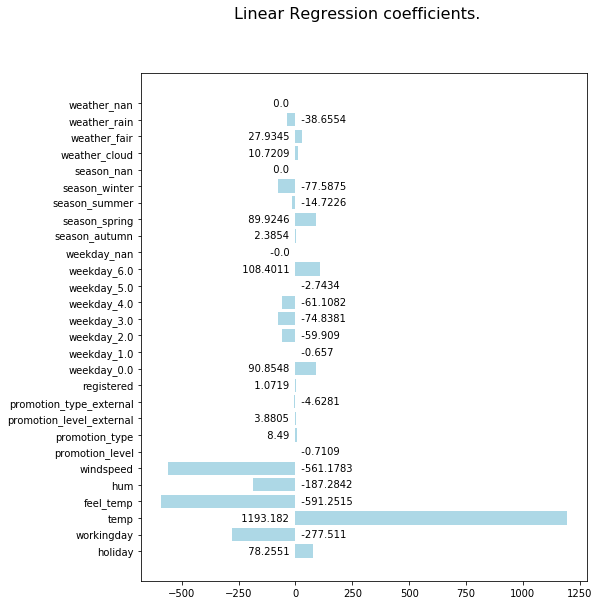

In [21]:
# coefficients plot
# let's call the above custom function.

custom_summary(model, train_columns, "Linear Regression coefficients.")

In [22]:
# evaluate the model with k = 10 Fold Cross validation

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
results = cross_val_score(model, X_test, y_test, scoring = 'r2', cv = folds)

print(type(model).__name__)
print("kFoldCV:")
print("Fold R2 scores:", results)
print("Mean R2 score:", results.mean())
print("Std R2 score:", results.std())
print("Generalizability on training set : ", results.mean(), " +/- ", results.std())

LinearRegression
kFoldCV:
Fold R2 scores: [0.96397593 0.96622757 0.80447553 0.98589551 0.99041678 0.98815215
 0.99430849 0.98098706 0.99883166 0.96729251]
Mean R2 score: 0.96405631939339
Std R2 score: 0.054447059375671826
Generalizability on training set :  0.96405631939339  +/-  0.054447059375671826


In [23]:
print("Original shape of X_train : ", X_train.shape)

Original shape of X_train :  (292, 28)


In [24]:
X.var()

holiday                     2.671986e-02
workingday                  2.163932e-01
temp                        3.594647e-02
feel_temp                   2.850545e-02
hum                         2.212477e-02
windspeed                   5.912089e-03
promotion_level             3.596417e+00
promotion_type              2.506849e-01
promotion_level_external    8.444709e+00
promotion_type_external     1.211395e+00
registered                  1.123834e+06
weekday_0.0                 1.225049e-01
weekday_1.0                 1.225049e-01
weekday_2.0                 1.225049e-01
weekday_3.0                 1.225049e-01
weekday_4.0                 1.225049e-01
weekday_5.0                 1.225049e-01
weekday_6.0                 1.244618e-01
weekday_nan                 0.000000e+00
season_autumn               1.876712e-01
season_spring               1.890411e-01
season_summer               1.890411e-01
season_winter               1.862863e-01
season_nan                  0.000000e+00
weather_cloud   

In [25]:
# play around with the threshold values
sel = VarianceThreshold(threshold = (0.01))
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [26]:
selected_features = list(X_train.columns[sel.get_support()])
print("Selected features : ", selected_features)
print("Removed features : ", list(X_train.columns[~sel.get_support()]))

Selected features :  ['holiday', 'workingday', 'temp', 'feel_temp', 'hum', 'promotion_level', 'promotion_type', 'promotion_level_external', 'promotion_type_external', 'registered', 'weekday_0.0', 'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0', 'weekday_5.0', 'weekday_6.0', 'season_autumn', 'season_spring', 'season_summer', 'season_winter', 'weather_cloud', 'weather_fair', 'weather_rain']
Removed features :  ['windspeed', 'weekday_nan', 'season_nan', 'weather_nan']


In [27]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [28]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# hyperparamater alpha : controls the degree of penaliation.
# play around with alpha values.
alpha = 1.0

#create the model
model_lasso = Lasso(alpha = alpha)

#fit the model on training data
model_lasso.fit(X_train, y_train)

#calculate the score on training data
y_pred_train = model_lasso.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))

On train set :  0.9862465918525257


In [29]:
#evaluate the model on testing data
y_pred_test = model_lasso.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9886501300741962


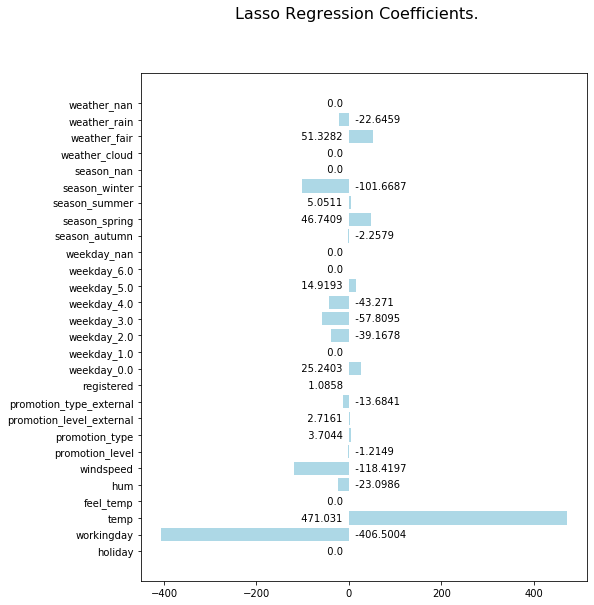

In [30]:
custom_summary(model_lasso, train_columns, "Lasso Regression Coefficients.")

In [31]:
from sklearn.linear_model import Ridge

# hyperparamater alpha : controls the degree of penaliation.
# play around with alpha values.
alpha = 1.0

#create the model
model_ridge = Ridge(alpha = 3.5)

#fit the model on training data
model_ridge.fit(X_train, y_train)

#calculate the score on training data
y_pred_train = model_ridge.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))

On train set :  0.985944349653417


In [32]:
#evaluate the model on testing data
y_pred_test = model_ridge.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9881710278643278


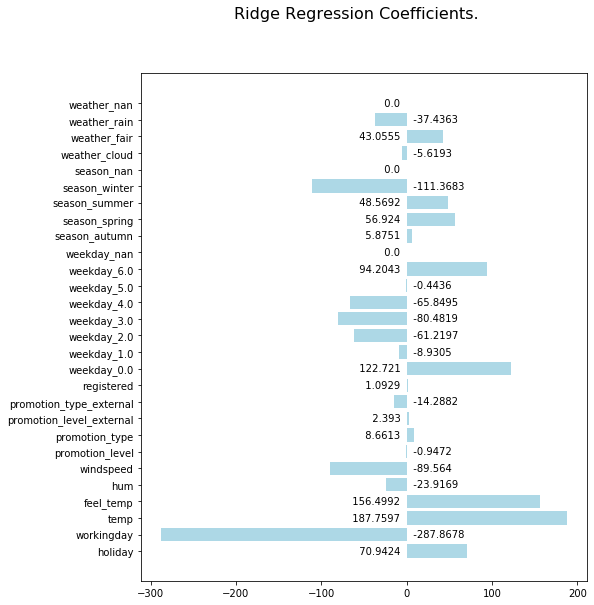

In [33]:
custom_summary(model_ridge, train_columns, "Ridge Regression Coefficients.")